In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style

In [2]:
# Rading the file
df = pd.read_csv("E:/Code/DataScience/Dataset/listings_summary.csv")

In [3]:
df.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,...,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.020000e+13,07-11-2018,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.020000e+13,07-11-2018,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,...,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.020000e+13,07-11-2018,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,...,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.020000e+13,07-11-2018,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,...,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.020000e+13,07-11-2018,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,...,9.0,t,NaN,f,f,moderate,f,f,1,1.75


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  object 
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

In [5]:
df.shape

(22552, 76)

In [6]:
# Deleting unnecessary columns
df.drop(["host_acceptance_rate", "jurisdiction_names"], axis=1, inplace=True), 

(None,)

## Null value Treatment

In [7]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# isnull() will give true or false if the 
# cell is null or not, then the sum function will count all the null values (i.e., true). And then we'll sort them according to the null values
df.isnull().sum().sort_values(ascending=False)  

square_feet                         22106
monthly_price                       19893
weekly_price                        18871
host_response_rate                  12895
host_response_time                  12894
security_deposit                     9361
cleaning_fee                         7146
host_neighbourhood                   5094
review_scores_value                  4435
review_scores_checkin                4432
review_scores_location               4431
review_scores_communication          4418
review_scores_accuracy               4414
review_scores_cleanliness            4411
review_scores_rating                 4389
reviews_per_month                    3914
first_review                         3914
last_review                          3908
neighbourhood                        1131
zipcode                               656
host_location                         116
state                                  84
market                                 63
beds                              

In [8]:
# Let's see how much percent of all the null values are there in each column
totalNumberOfNull = df.isnull().sum().sum()

In [9]:
round (df.isnull().sum().sort_values(ascending=False) * 100 /  totalNumberOfNull , 2)

square_feet                         14.42
monthly_price                       12.98
weekly_price                        12.31
host_response_rate                   8.41
host_response_time                   8.41
security_deposit                     6.11
cleaning_fee                         4.66
host_neighbourhood                   3.32
review_scores_value                  2.89
review_scores_checkin                2.89
review_scores_location               2.89
review_scores_communication          2.88
review_scores_accuracy               2.88
review_scores_cleanliness            2.88
review_scores_rating                 2.86
reviews_per_month                    2.55
first_review                         2.55
last_review                          2.55
neighbourhood                        0.74
zipcode                              0.43
host_location                        0.08
state                                0.05
market                               0.04
beds                              

In [10]:
# Let's see how much percent of null values are there 
round(df.isnull().sum().sort_values(ascending=False) * 100 /  df.shape[0] , 2)

square_feet                         98.02
monthly_price                       88.21
weekly_price                        83.68
host_response_rate                  57.18
host_response_time                  57.17
security_deposit                    41.51
cleaning_fee                        31.69
host_neighbourhood                  22.59
review_scores_value                 19.67
review_scores_checkin               19.65
review_scores_location              19.65
review_scores_communication         19.59
review_scores_accuracy              19.57
review_scores_cleanliness           19.56
review_scores_rating                19.46
reviews_per_month                   17.36
first_review                        17.36
last_review                         17.33
neighbourhood                        5.02
zipcode                              2.91
host_location                        0.51
state                                0.37
market                               0.28
beds                              

In [11]:
df["cancellation_policy"]

0        strict_14_with_grace_period
1                           flexible
2        strict_14_with_grace_period
3        strict_14_with_grace_period
4                           moderate
5        strict_14_with_grace_period
6        strict_14_with_grace_period
7        strict_14_with_grace_period
8        strict_14_with_grace_period
9        strict_14_with_grace_period
10       strict_14_with_grace_period
11       strict_14_with_grace_period
12       strict_14_with_grace_period
13       strict_14_with_grace_period
14       strict_14_with_grace_period
15       strict_14_with_grace_period
16       strict_14_with_grace_period
17       strict_14_with_grace_period
18       strict_14_with_grace_period
19       strict_14_with_grace_period
20       strict_14_with_grace_period
21                          flexible
22       strict_14_with_grace_period
23       strict_14_with_grace_period
24                          moderate
25       strict_14_with_grace_period
26       strict_14_with_grace_period
2

## Different methods of imputing:
### 1. Remove all the columns which have percent of null values greater than 50%
### 2. Replacing with measure of central tendency 
- Mean and median for numerical data
- Mode for categorical data

### 3. Predictive Modeling
- By analysing nearest neighbours 
- Ex. : KNN-Imputers

In [12]:
original_df = df.copy()

In [13]:
# Dropping columns with null value % >= 50
df.drop(columns = ["square_feet", "monthly_price", "weekly_price", "host_response_rate", "host_response_time"], axis = 1, inplace = True)

In [14]:
# dropping some columns which will never impact the prices. If we are not sure for 0.1% then we'll not drop that 
df.drop(columns = ["country_code", "country", "host_id", "scrape_id", "last_scraped", "calendar_last_scraped", "host_name", "id", "experiences_offered", "has_availability"], axis = 1, inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        22526 non-null  object 
 1   host_location                     22436 non-null  object 
 2   host_is_superhost                 22526 non-null  object 
 3   host_neighbourhood                17458 non-null  object 
 4   host_listings_count               22526 non-null  float64
 5   host_total_listings_count         22526 non-null  float64
 6   host_verifications                22526 non-null  object 
 7   host_has_profile_pic              22526 non-null  object 
 8   host_identity_verified            22526 non-null  object 
 9   street                            22552 non-null  object 
 10  neighbourhood                     21421 non-null  object 
 11  neighbourhood_cleansed            22552 non-null  object 
 12  neig

In [16]:
df.columns.sort_values()

Index(['accommodates', 'amenities', 'availability_30', 'availability_365',
       'availability_60', 'availability_90', 'bathrooms', 'bed_type',
       'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_updated', 'cancellation_policy', 'city', 'cleaning_fee',
       'extra_people', 'first_review', 'guests_included',
       'host_has_profile_pic', 'host_identity_verified', 'host_is_superhost',
       'host_listings_count', 'host_location', 'host_neighbourhood',
       'host_since', 'host_total_listings_count', 'host_verifications',
       'instant_bookable', 'is_business_travel_ready', 'is_location_exact',
       'last_review', 'latitude', 'longitude', 'market', 'maximum_nights',
       'minimum_nights', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'number_of_reviews', 'price',
       'property_type', 'require_guest_phone_verification',
       'require_guest_profile_picture', 'requires_license',
       'review_scores_accuracy', 'r

In [17]:
df["price"] = df["price"].replace('[\$,]', '', regex=True).astype("float64")
df.price

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_16600\3162929546.py:1: SyntaxWarning: invalid escape sequence '\$'
  df["price"] = df["price"].replace('[\$,]', '', regex=True).astype("float64")


0          60.0
1          17.0
2          90.0
3          26.0
4          42.0
5         180.0
6          70.0
7         120.0
8          90.0
9          45.0
10         49.0
11        129.0
12         70.0
13         98.0
14        160.0
15         65.0
16         90.0
17         90.0
18        197.0
19         70.0
20         90.0
21         60.0
22        130.0
23        100.0
24         44.0
25         62.0
26         55.0
27         40.0
28         25.0
29         52.0
30         39.0
31         80.0
32         80.0
33         50.0
34         43.0
35         40.0
36         36.0
37        119.0
38         90.0
39         42.0
40         56.0
41         50.0
42         48.0
43        160.0
44         70.0
45         88.0
46         55.0
47         88.0
48         90.0
49         55.0
50        200.0
51         80.0
52         49.0
53         55.0
54        130.0
55         90.0
56        120.0
57         37.0
58         52.0
59         44.0
60        102.0
61         29.0
62      

In [18]:
cols = ["security_deposit", "cleaning_fee", "extra_people", "price"]
for col in cols:
    df[col] = df[col].replace('[/$,]', '', regex=True).astype("float64")
    df[col] = df[col].replace('[/,,]', '', regex=True).astype("float64")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_since                        22526 non-null  object 
 1   host_location                     22436 non-null  object 
 2   host_is_superhost                 22526 non-null  object 
 3   host_neighbourhood                17458 non-null  object 
 4   host_listings_count               22526 non-null  float64
 5   host_total_listings_count         22526 non-null  float64
 6   host_verifications                22526 non-null  object 
 7   host_has_profile_pic              22526 non-null  object 
 8   host_identity_verified            22526 non-null  object 
 9   street                            22552 non-null  object 
 10  neighbourhood                     21421 non-null  object 
 11  neighbourhood_cleansed            22552 non-null  object 
 12  neig

In [20]:
# Separating categorical and numerical data
numerical, categorical = [], []

for col in df.columns:
    if (df[col].dtype == "int64" or df[col].dtype == "float64"):
        numerical.append(col)
    else:
        categorical.append(col)

In [21]:
len(categorical), len(numerical)

(28, 31)

### Null value treatment

In [22]:
# For numerical column
for col in numerical:        
    df[col] =  df[col].fillna(df[col].median())

In [23]:
# for catgoriacal value
for col in categorical:        
    df[col] =  df[col].fillna(df[col].mode()[0])

In [24]:
df[categorical].head()

,host_since,host_location,host_is_superhost,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,is_location_exact,property_type,room_type,bed_type,amenities,calendar_updated,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,18-08-2008,"Key Biscayne, Florida, United States",t,Mitte,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",f,Guesthouse,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",3 months ago,t,f,f,strict_14_with_grace_period,f,f
1,16-09-2008,"Berlin, Berlin, Germany",f,Prenzlauer Berg,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Neukölln,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",t,Apartment,Private room,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",7 weeks ago,t,f,f,flexible,f,f
2,19-10-2008,"Coledale, New South Wales, Australia",f,Prenzlauer Berg,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",t,Apartment,Entire home/apt,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",a week ago,t,t,f,strict_14_with_grace_period,f,f
3,07-11-2008,"Berlin, Berlin, Germany",f,Schöneberg,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",t,Apartment,Private room,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",4 weeks ago,t,f,f,strict_14_with_grace_period,f,f
4,16-05-2009,"Berlin, Berlin, Germany",t,Prenzlauer Berg,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",t,Apartment,Private room,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",3 days ago,t,f,f,moderate,f,f


# Now it's time for EDA

- Three types of EDA :
    1. Univariate
    2. Bivariate
    3. Multivariate

### 1. Univariate
- Numerical and categerical data. Distribution 

In [25]:
numerical

['host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'security_deposit',
 'cleaning_fee',
 'guests_included',
 'extra_people',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']

In [28]:
# let's change the data as columns are more

df = pd.read_csv("./../Dataset/usHeartPatient.csv")

In [62]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='object')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   object 
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot cholesterol  4180 non-null   float64
 10  Systolic BP      4236 non-null   float64
 11  Diastolic BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart-Att        4240 non-null   int64  
 16  Unnamed: 16      0 non-null      float64
 17  Unnamed: 17   

In [102]:
round(df.isnull().sum().sort_values(ascending=False) * 100 /  df.shape[0] , 2)

Gender             0.0
age                0.0
education          0.0
currentSmoker      0.0
cigsPerDay         0.0
BP Meds            0.0
prevalentStroke    0.0
prevalentHyp       0.0
diabetes           0.0
tot cholesterol    0.0
Systolic BP        0.0
Diastolic BP       0.0
BMI                0.0
heartRate          0.0
glucose            0.0
Heart-Att          0.0
dtype: float64

In [69]:
# Separating categorical and numerical data
numerical, categorical = [], []

for col in df.columns:
    if (df[col].dtype == "int64" or df[col].dtype == "float64"):
        numerical.append(col)
    else:
        categorical.append(col)

In [70]:
# for catgoriacal value
for col in categorical:        
    df[col] =  df[col].fillna(df[col].mode()[0])

In [71]:
# For numerical column
for col in numerical:        
    df[col] =  df[col].fillna(df[col].median())

In [72]:
df.shape

(4240, 16)

## categorical data plots

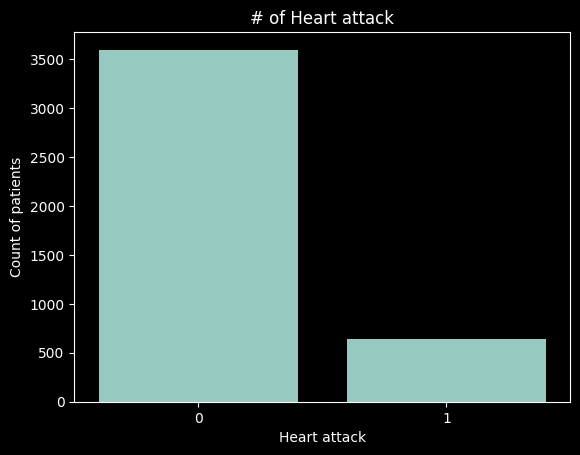

In [114]:
plt.style.use("dark_background")
sns.countplot(data = df, x = "Heart-Att")
plt.title("# of Heart attack")
plt.xlabel("Heart attack")
plt.ylabel("Count of patients")
plt.show()

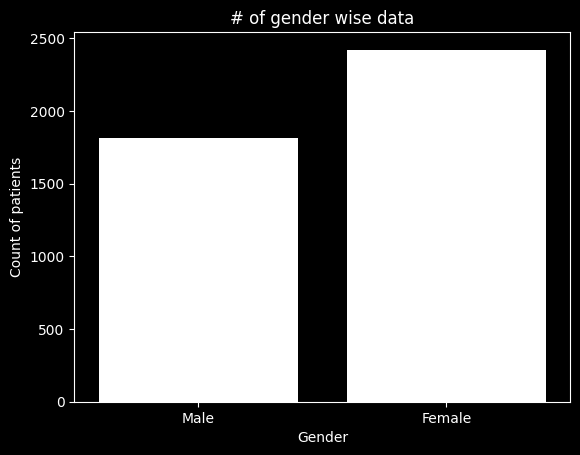

In [115]:
c = sns.countplot(data = df, x = "Gender", color="white")
plt.title("# of gender wise data")
plt.xlabel("Gender")
plt.ylabel("Count of patients")
plt.show()

In [116]:
plotToBeCreated = ["education", "currentSmoker", "BP Meds", "prevalentStroke", "prevalentHyp", "diabetes"]

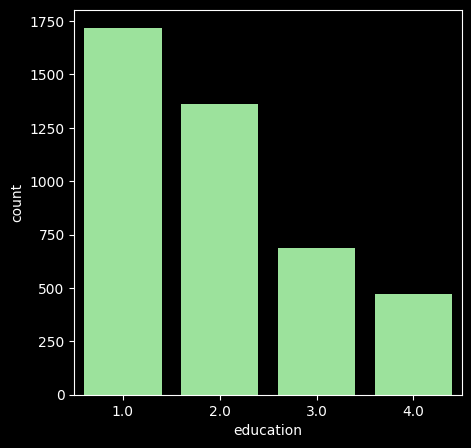

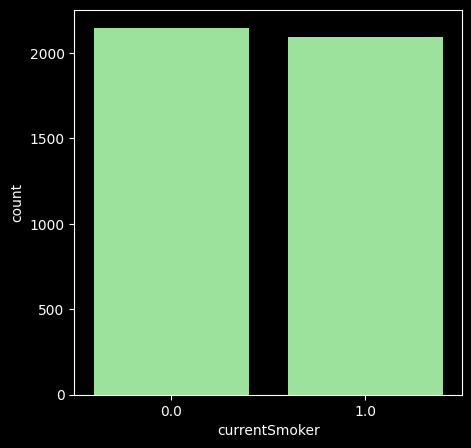

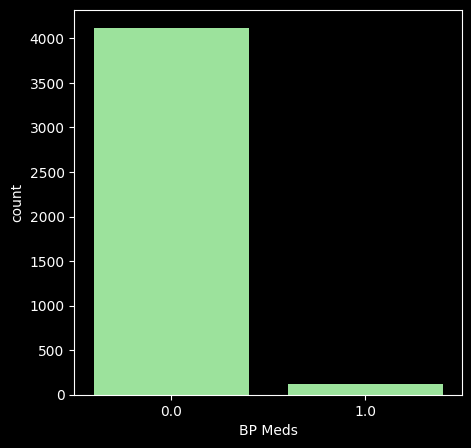

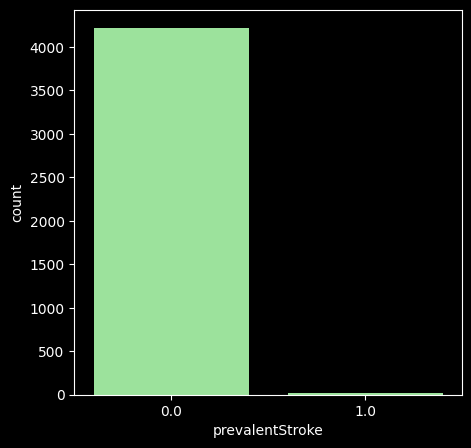

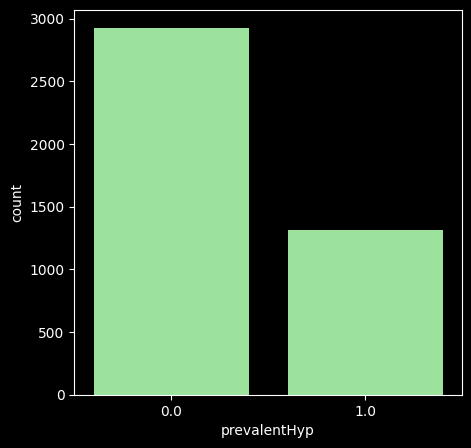

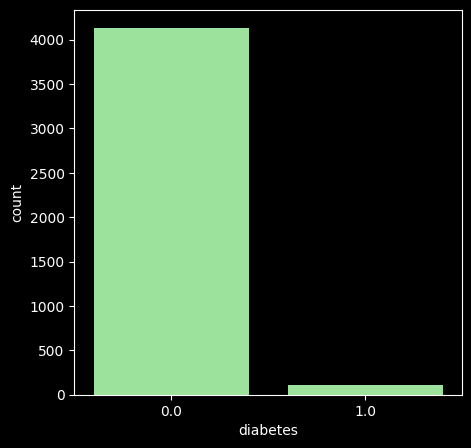

In [117]:
for i in plotToBeCreated:
    plt.figure(figsize=(5, 5))
    c = sns.countplot(data = df, x = i, color="lightgreen")
    plt.show()

## Plot for numerical data

In [123]:
# 1. Boxplot - For spotting numerical data

numerical


['age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BP Meds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'tot cholesterol',
 'Systolic BP',
 'Diastolic BP',
 'BMI',
 'heartRate',
 'glucose',
 'Heart-Att']

In [134]:
numerical = ["age", "cigsPerDay", "tot cholesterol", "Systolic BP", "Diastolic BP", "BMI", "glucose", "heartRate"]

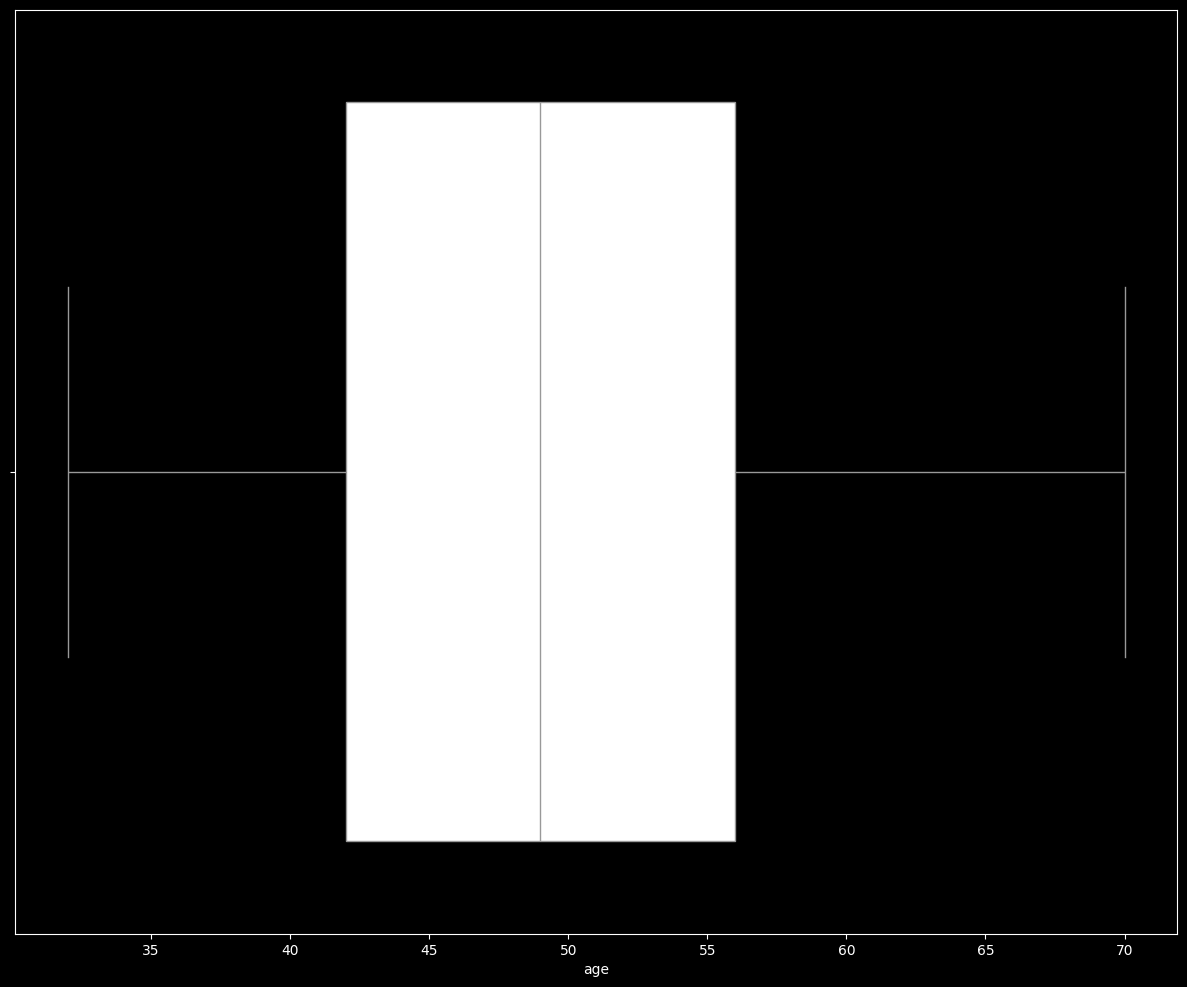

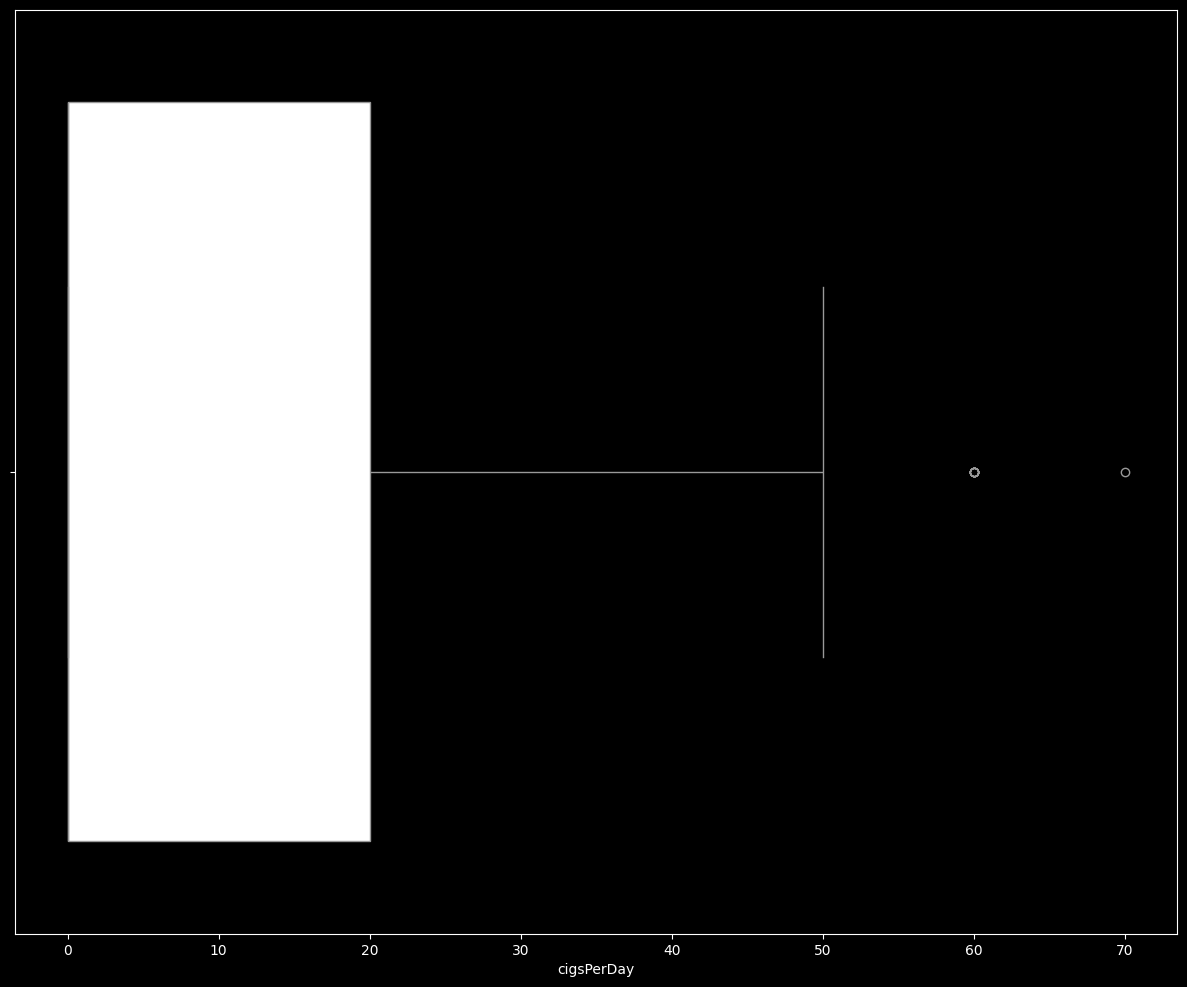

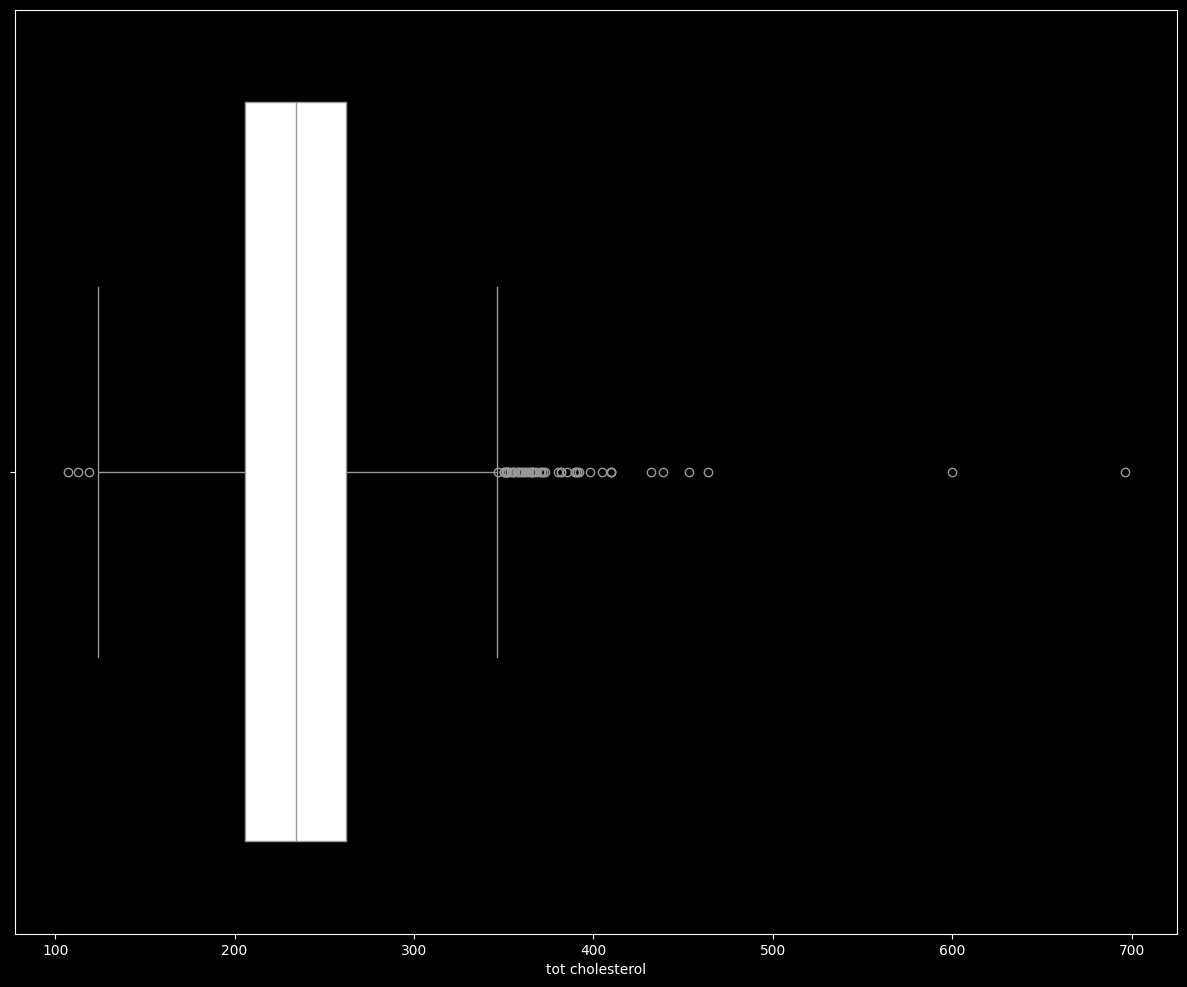

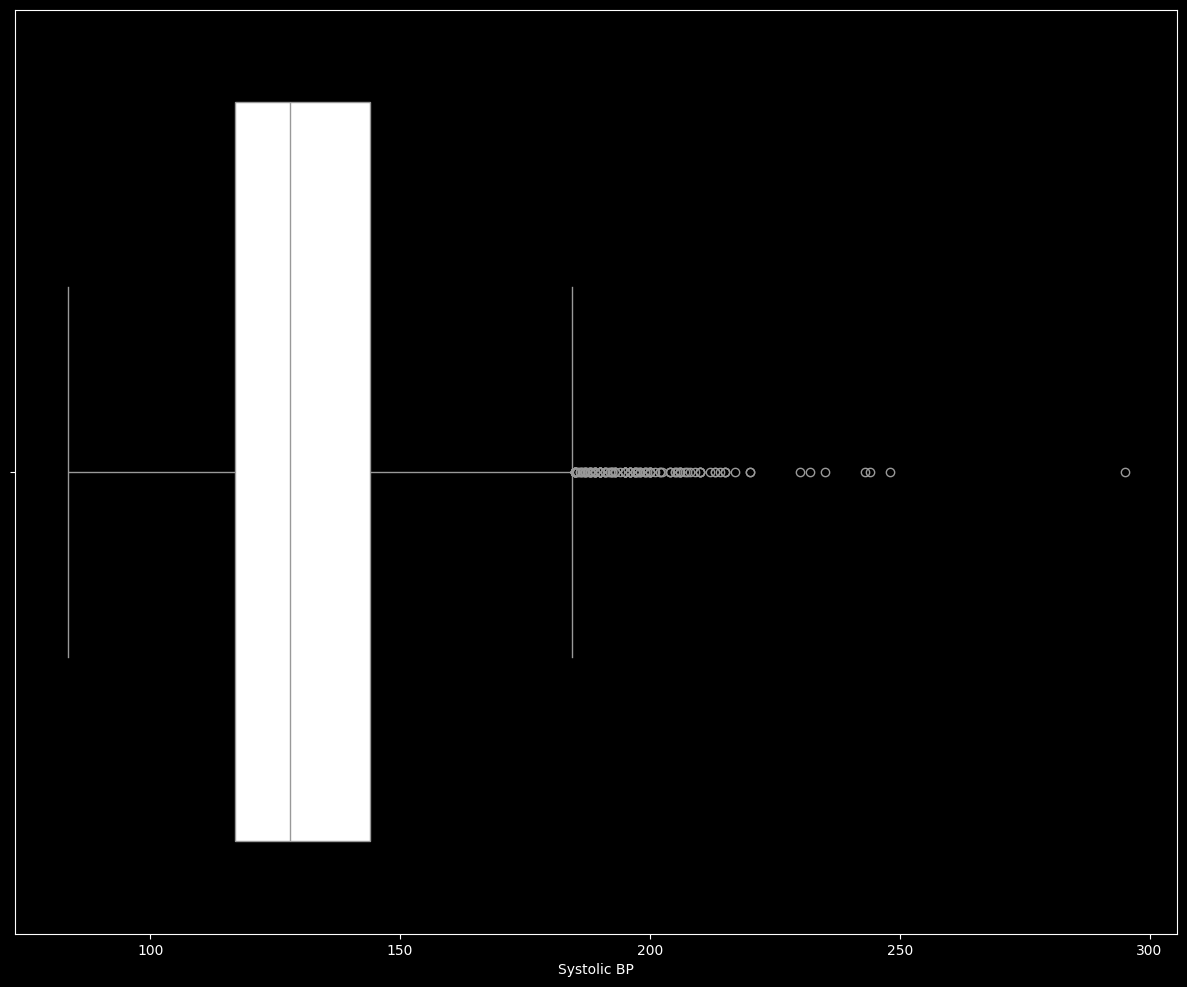

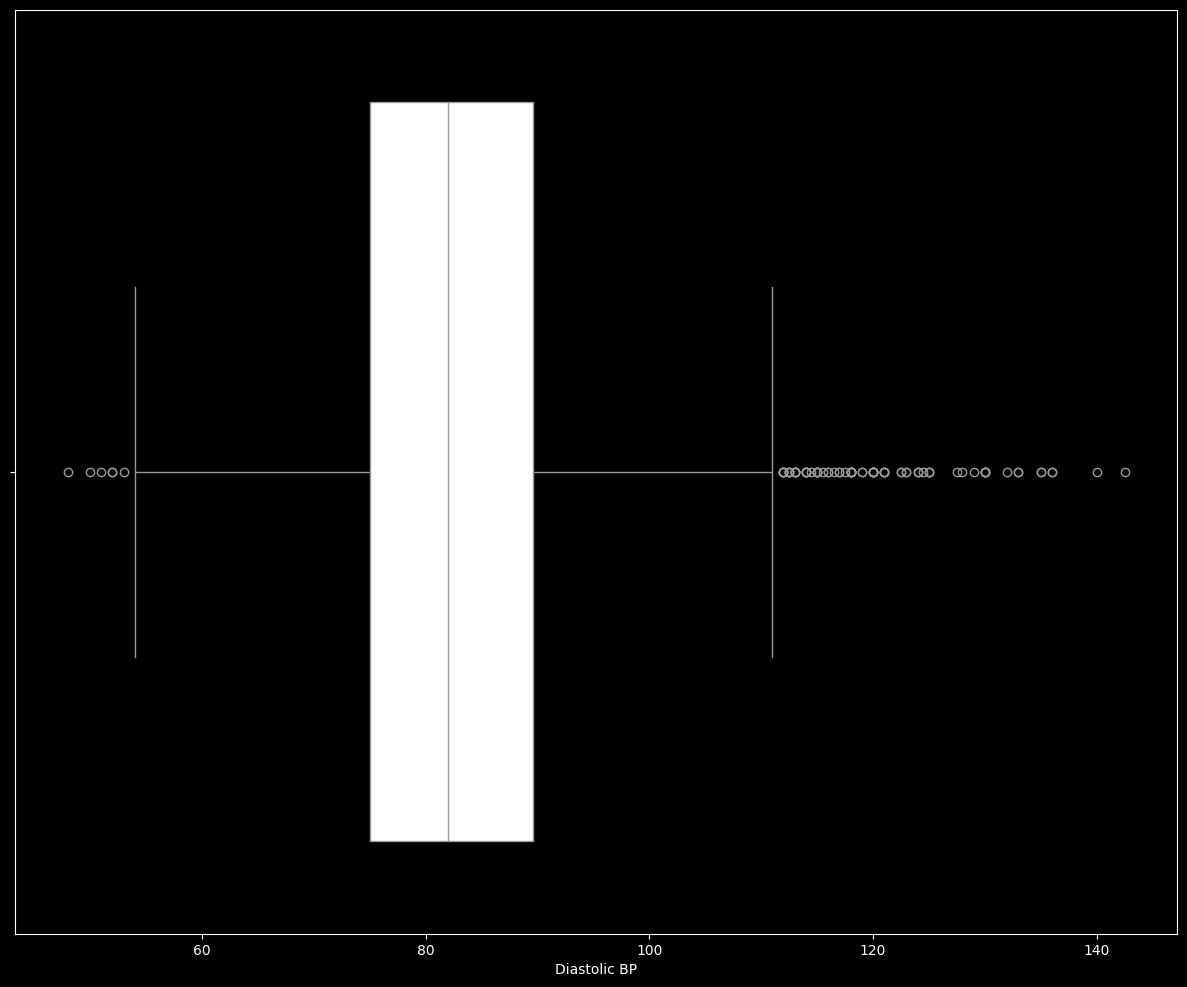

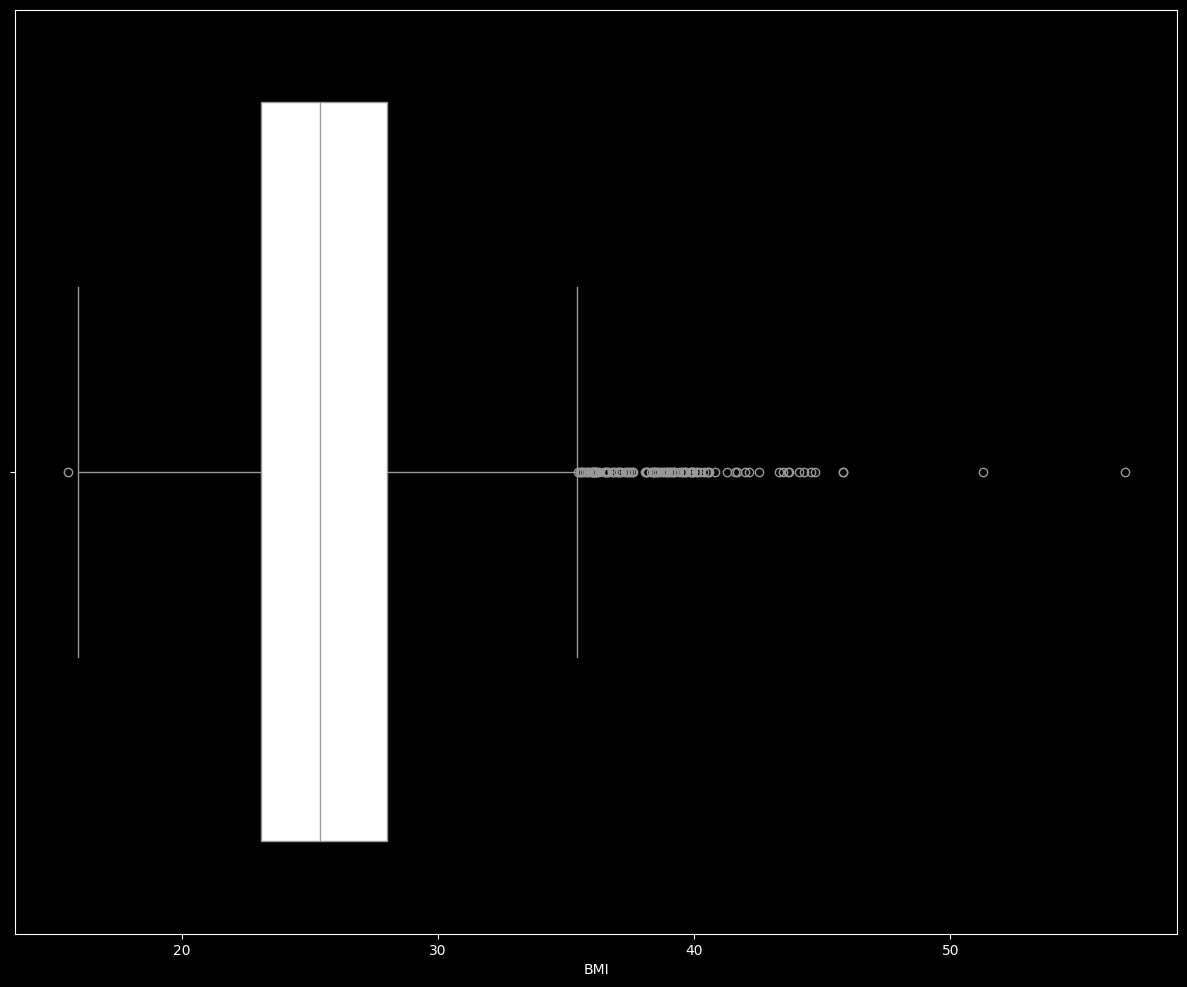

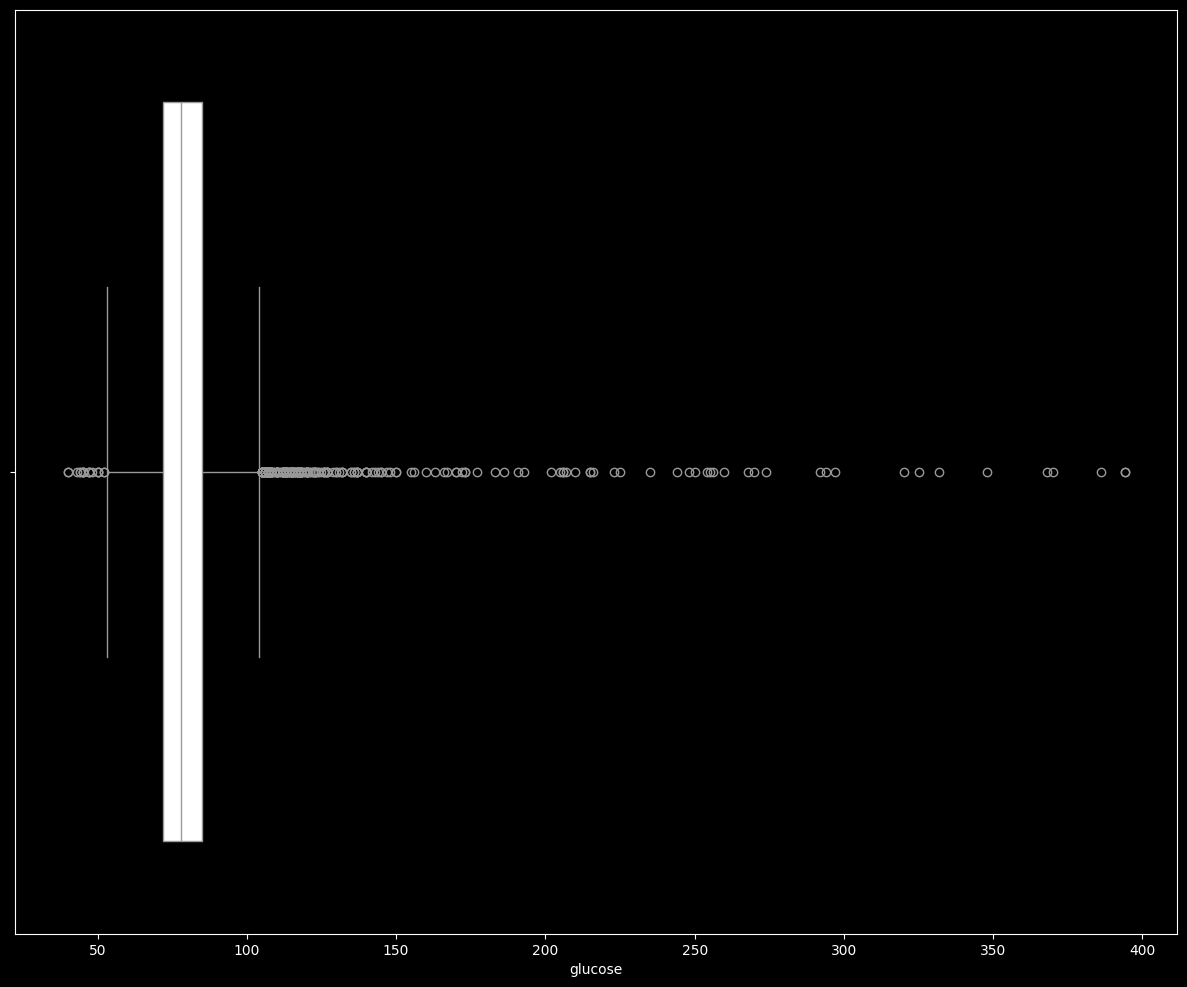

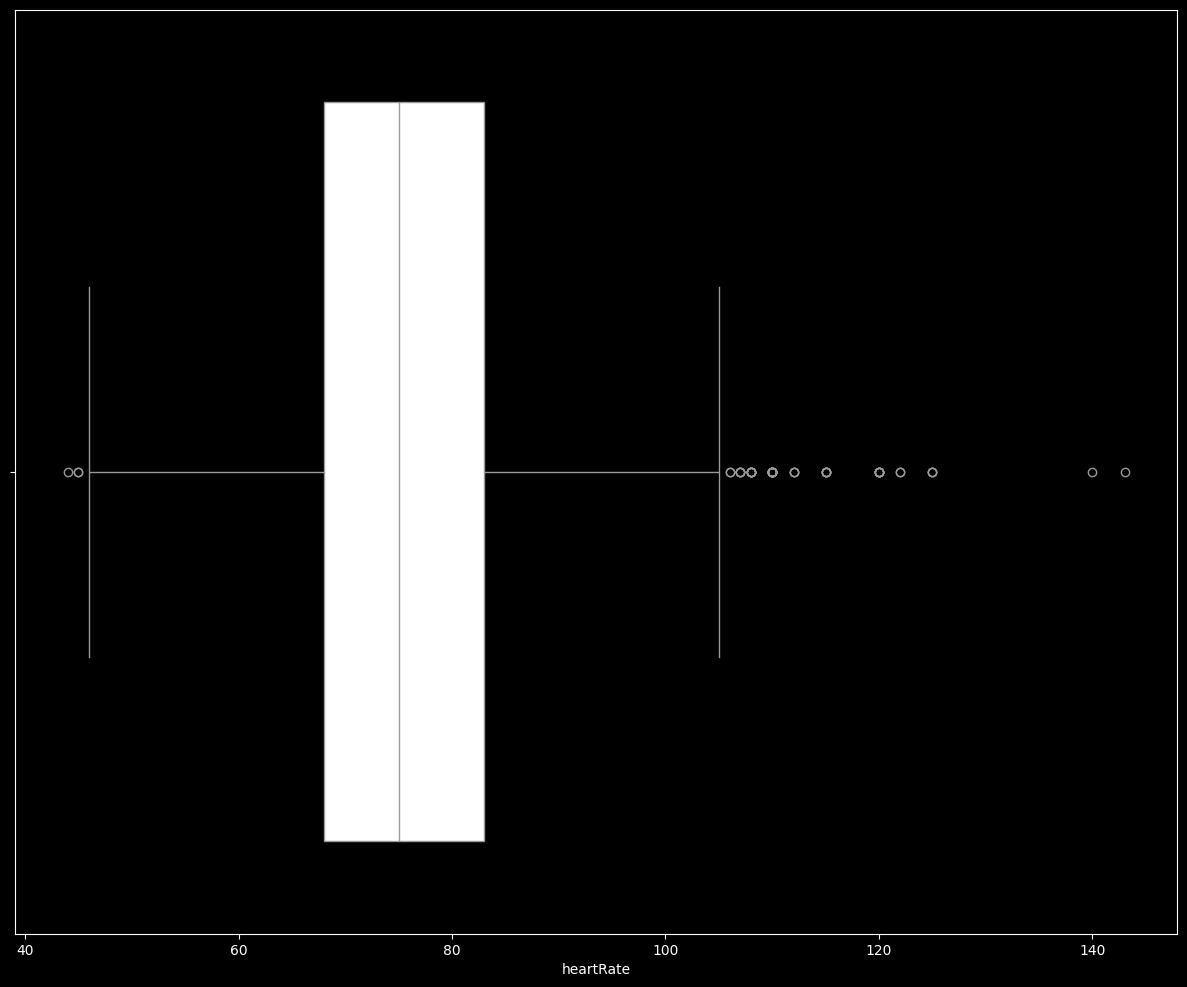

In [139]:
for col in numerical:
    plt.figure(figsize=(15,12))
    plot = sns.boxplot(df[col], orient="h", color="white")
    plt.show()